## **Capstone MDS - DecisionTreeRegressor**

#### **_Integrantes:_**  

1. Evans Díaz   
1. Felipe Ojeda
1. Javier Cofre  
1. Luis Reinoso

In [1]:
# importar librerías
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
import graphviz
import shap

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from scipy.stats import randint, uniform
from matplotlib.ticker import EngFormatter

/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# función cálculo R2, RMSE y MSE
def R2_RMSE(y_true, y_pred):
  # cálculo de R2 y RMSE
  r2 = r2_score(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  
  return print('R2:',r2), print('RMSE:',rmse), print('MSE:', mse)

## **_1. Lectura (carga) de los Datos_**

In [3]:
# importamos archivo
#df = pd.read_csv('../Data/df_final_pay_sin_mt.csv')

# importamos archivo desde github (ojo que la rama se llama master)
df = pd.read_csv('https://raw.githubusercontent.com/ecdiazl/capstone-project/master/Data/df_final_pay_sin_mt.csv')

In [4]:
# miramos el dataframe
df.head()

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0
1,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0
2,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0
3,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0
4,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0


In [5]:
# información general df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 84 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_2023            1567 non-null   bool   
 1   year_2024            1567 non-null   bool   
 2   month_2              1567 non-null   bool   
 3   month_3              1567 non-null   bool   
 4   month_4              1567 non-null   bool   
 5   month_5              1567 non-null   bool   
 6   month_6              1567 non-null   bool   
 7   month_7              1567 non-null   bool   
 8   month_8              1567 non-null   bool   
 9   month_9              1567 non-null   bool   
 10  month_10             1567 non-null   bool   
 11  month_11             1567 non-null   bool   
 12  month_12             1567 non-null   bool   
 13  day_2                1567 non-null   bool   
 14  day_3                1567 non-null   bool   
 15  day_4                1567 non-null   b

## **_2 Preparación del DataFrame_**

In [6]:
# transformamos las variables bool a categorical y le asignamos 0 o 1
for col in df.columns:
  if df[col].dtype == 'bool':
     df[col] = df[col].astype('category').cat.codes
     df[col] = df[col].astype('category') # para que quede como category y no como int8

In [7]:
print('Nombre Columnas: ',df.columns)
print('Cantidad Columnas: ',len(df.columns))

Nombre Columnas:  Index(['year_2023', 'year_2024', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21',
       'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'day_31', 'shift_B', 'crew_E2', 'crew_E3',
       'crew_E4', 'total', 'efectivo', 'mantencion', 'mecanica', 'electrica',
       'mant_excl', 'mec_excl', 'elec_excl', 'som_excl', 'demora', 'r_prog',
       'r_noprg', 'waiting', 'queued', 'payload', 'distance', 'distance_down',
       'distance_down_level', 'distance_up', 'distance_up_level',
       'expected_time', 'lift_down', 'lift_down_level', 'lift_up',
       'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC', 'KOM-CHQ',
       'KOM.96

In [8]:
# cálculamos la desviaicón estándar y la media de payload
std_y = df['payload'].std()
mean_y = df['payload'].mean()

print('Desviación Estándar:',std_y)
print('Media:',mean_y)

Desviación Estándar: 19936.05577427206
Media: 142357.4639507874


In [9]:
# estandarizamos las variables numéricas
col_num = df.drop('payload', axis=1).select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()
df[col_num] = scaler.fit_transform(df[col_num])

## **_3 Modelo DecisionTreeRegressor_**

In [10]:
# definimos el tamaño del set de test
test_size = 0.3

In [11]:
# separamos los datos en X e y
X = df.drop('payload', axis=1)
y = df['payload']

# dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 

In [12]:
# Ajustar los hiperparámetros para prevenir el sobreajuste
model = DecisionTreeRegressor(max_depth=5, min_samples_split=20, min_samples_leaf=10)


In [13]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20)

###   _3.1 Predicciones en el conjunto de entrenamiento_

In [14]:
# Realizar predicciones en el conjunto de entrenamiento
predictions_train = model.predict(X_train)

In [15]:
# resultados de R2, RMSE y MSE
R2_RMSE(y_train, predictions_train)

R2: 0.6837920727375847
RMSE: 11199.073410707502
MSE: 125419245.25841576


(None, None, None)

###  _3.2 Predicciones en el conjunto de testeo_

In [16]:
# Realizar predicciones en el conjunto de test
predictions_test = model.predict(X_test)

In [17]:
# resultados de R2, RMSE y MSE
R2_RMSE(y_test, predictions_test)

R2: 0.5413950161276944
RMSE: 13516.712946972164
MSE: 182701528.8908449


(None, None, None)

In [18]:
# Graficar el árbol de decisión
dot_data = export_graphviz(model, out_file=None, 
                            feature_names=X_train.columns,  
                            filled=True, rounded=True,  
                            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('../Graficos/payload_tree')

'../Graficos/payload_tree.pdf'

## **_4 Optimización del Modelo_**

### _4.1 Selección de Variables (LassoCV)_

In [19]:
# buscamos alpha optimo con LassoCV
alpha_values = np.linspace(0.01, 300, 3000)

# Crea un objeto LassoCV
lasso_cv = LassoCV(alphas=alpha_values, cv=5)

# Ajusta el modelo a los datos de entrenamiento
lasso_cv.fit(X_train, y_train)

# Valor óptimo de alpha
best_alpha = lasso_cv.alpha_

# Evalúa el modelo en el conjunto de prueba
score = lasso_cv.score(X_test, y_test)

print(f"Mejor valor de alpha: {best_alpha}")
print(f"Puntuación en el conjunto de prueba: {score}")

/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42258714.71920776, tolerance: 35584840.128719084
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120978834.77467346, tolerance: 35584840.128719084
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232749727.64689636, tolerance: 35584840.128719084
  model = cd_fast.enet_coordinat

Mejor valor de alpha: 51.02530510170057
Puntuación en el conjunto de prueba: 0.7151309355390548


/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81762075.53416443, tolerance: 34575755.66345586
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204652581.6369171, tolerance: 34575755.66345586
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349234331.71006775, tolerance: 34575755.66345586
  model = cd_fast.enet_coordinate_de

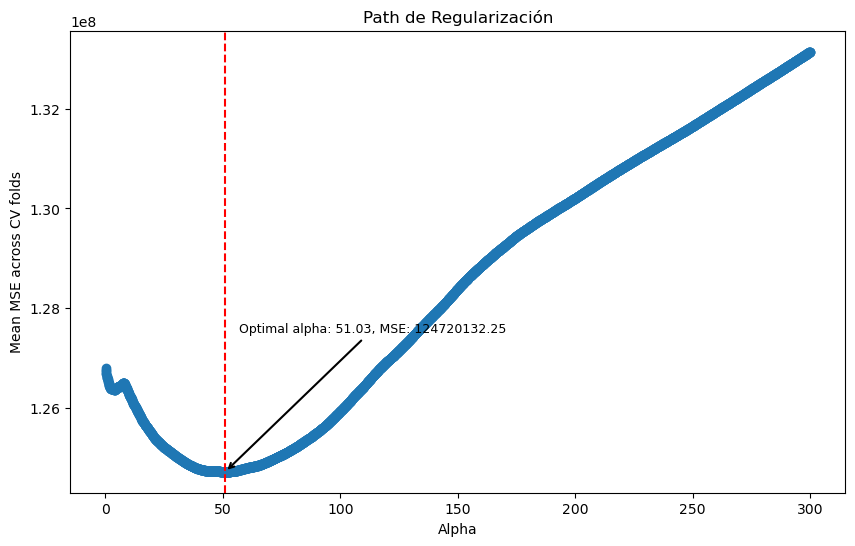

In [20]:
# Graficar MSE vs. Alpha
plt.figure(figsize=(10,6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), '-o')
plt.xlabel('Alpha')
plt.ylabel('Mean MSE across CV folds')
plt.title('Path de Regularización')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--')

# Anotar el valor óptimo de alpha en el gráfico
plt.annotate(f'Optimal alpha: {lasso_cv.alpha_:.2f}, MSE: {np.min(np.mean(lasso_cv.mse_path_, axis=1)):.2f}',
             xy=(lasso_cv.alpha_, np.min(np.mean(lasso_cv.mse_path_, axis=1))),
             xycoords='data', xytext=(10,100), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", lw=1.5),
             fontsize=9)

plt.show()

In [21]:
# Aplicar Lasso para la selección de características
lasso = Lasso(alpha=lasso_cv.alpha_)  
lasso.fit(X_train, y_train)

# Seleccionar las características que tienen coeficientes no nulos
selected_features = X_train.columns[lasso.coef_ != 0]

print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['year_2024', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_11', 'day_13', 'day_17', 'day_19', 'day_20', 'day_22',
       'day_23', 'day_26', 'day_27', 'day_28', 'day_30', 'day_31', 'shift_B',
       'crew_E2', 'crew_E4', 'efectivo', 'mantencion', 'mecanica', 'mant_excl',
       'mec_excl', 'demora', 'r_prog', 'r_noprg', 'waiting', 'queued',
       'distance_down_level', 'distance_up', 'distance_up_level',
       'expected_time', 'lift_down', 'lift_down_level', 'lift_up',
       'travel_time', 'CAT 797-F', 'CAT 798-AC', 'KOM-CHQ', 'Kom.930E-4',
       'Kom.930E-4SE', 'Kom.930EN', 'Kom.930ER-MT', 'Komatsu AHS'],
      dtype='object')


In [22]:
len(selected_features)

55

> Volvemos ajustar el modelo con las variables seleccionadas

In [23]:
# separamos los datos en train y test
X_lasso= df[selected_features]
y_lasso = df['payload']

# dividimos los datos en train y test
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=test_size, random_state=42)

In [24]:
# Inicializar el regresor DecisionTree
model_lasso = DecisionTreeRegressor(max_depth=5, min_samples_split=20, min_samples_leaf=10)

In [25]:
# Entrenar el modelo DecisionTree
model_lasso.fit(X_train_lasso, y_train_lasso)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20)

#### 4.1.1 Predicciones en el conjunto de entrenamiento

In [26]:
# Realizar predicciones con el modelo entrenado
predictions_lasso_train = model_lasso.predict(X_train_lasso)

In [27]:
# resultado de R2, RMSE y MSE
R2_RMSE(y_train_lasso, predictions_lasso_train)

R2: 0.6821851710526762
RMSE: 11227.493009914506
MSE: 126056599.28767908


(None, None, None)

#### 4.1.2 Predicciones en el conjunto de testeo

In [28]:
# Realizar predicciones con el modelo entrenado
predictions_lasso_test = model_lasso.predict(X_test_lasso)

In [29]:
# resultado de R2, RMSE y MSE
R2_RMSE(y_test_lasso, predictions_lasso_test)

R2: 0.5497636722397914
RMSE: 13392.818168606096
MSE: 179367578.49734557


(None, None, None)

In [30]:
# Graficar el árbol de decisión
dot_data_lasso= export_graphviz(model_lasso, out_file=None, 
                            feature_names=X_train_lasso.columns,  
                            filled=True, rounded=True,  
                            special_characters=True,
                            proportion=True
                            ) 
# Modifica el archivo DOT para tener una orientación vertical
dot_data_lasso = dot_data_lasso.replace('digraph Tree {', 'digraph Tree {\nrankdir=LR;')

graph = graphviz.Source(dot_data_lasso)  
graph.render("../Graficos/payload_tree_lasso")

'../Graficos/payload_tree_lasso.pdf'

In [31]:
model_lasso.tree_.node_count

55

### _4.2 Poda Arbol (LassoCV)_

In [32]:
# Calcular el error cuadrático medio en el conjunto de prueba
y_pred_lasso = model_lasso.predict(X_test_lasso)
mse_lasso = mean_squared_error(y_test_lasso, y_pred_lasso)
print(f"Error cuadrático medio sin poda: {mse_lasso}")

# Podar el árbol
path = model_lasso.cost_complexity_pruning_path(X_train_lasso, y_train_lasso)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

model_lassos = []
for ccp_alpha in ccp_alphas:
    model_lasso = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    model_lasso.fit(X_train_lasso, y_train_lasso)
    model_lassos.append(model_lasso)

# Eliminar el último regresor, ya que corresponde al árbol no podado
model_lassos = model_lassos[:-1]
ccp_alphas = ccp_alphas[:-1]

# Evaluar el error cuadrático medio de cada árbol podado en el conjunto de prueba
mses = [mean_squared_error(y_test_lasso, model_lasso.predict(X_test_lasso)) for model_lasso in model_lassos]

# Encontrar el índice del mejor árbol (el que tiene el menor error cuadrático medio)
best_index = mses.index(min(mses))
best_model_lasso = model_lassos[best_index]
best_ccp_alpha = ccp_alphas[best_index]

# Calcular y mostrar el error cuadrático medio del mejor árbol podado
y_pred_pruned = best_model_lasso.predict(X_test_lasso)
mse_pruned = mean_squared_error(y_test_lasso, y_pred_pruned)
print(f"Error cuadrático medio con poda: {mse_pruned}")

Error cuadrático medio sin poda: 179367578.49734557


Error cuadrático medio con poda: 168877762.8254098


In [33]:
best_model_lasso.tree_.node_count

25

In [34]:
# Graficar el árbol de decisión
dot_data_lasso_pruned= export_graphviz(best_model_lasso, out_file=None, 
                            feature_names=X_train_lasso.columns,  
                            filled=True, rounded=True,  
                            special_characters=True,
                            proportion=True
                            )
# Modifica el archivo DOT para tener una orientación vertical
dot_data_lasso_pruned = dot_data_lasso_pruned.replace('digraph Tree {', 'digraph Tree {\nrankdir=LR;')

graph = graphviz.Source(dot_data_lasso_pruned)  
graph.render("../Graficos/payload_tree_lasso_pruned")

'../Graficos/payload_tree_lasso_pruned.pdf'

#### _4.2.1 Predicciones en el conjunto de entrenamiento_

In [35]:
# Realizar predicciones con el modelo entrenado
predictions_lasso_train_pruned = best_model_lasso.predict(X_train_lasso)

In [36]:
# resultado de R2, RMSE y MSE
R2_RMSE(y_train_lasso, predictions_lasso_train_pruned)

R2: 0.623842884480245
RMSE: 12214.631110325108
MSE: 149197213.161322


(None, None, None)

In [37]:
feature_names = X_train_lasso.columns.tolist() + [y_train_lasso.name]

In [38]:
feature_names

['year_2024',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'day_11',
 'day_13',
 'day_17',
 'day_19',
 'day_20',
 'day_22',
 'day_23',
 'day_26',
 'day_27',
 'day_28',
 'day_30',
 'day_31',
 'shift_B',
 'crew_E2',
 'crew_E4',
 'efectivo',
 'mantencion',
 'mecanica',
 'mant_excl',
 'mec_excl',
 'demora',
 'r_prog',
 'r_noprg',
 'waiting',
 'queued',
 'distance_down_level',
 'distance_up',
 'distance_up_level',
 'expected_time',
 'lift_down',
 'lift_down_level',
 'lift_up',
 'travel_time',
 'CAT 797-F',
 'CAT 798-AC',
 'KOM-CHQ',
 'Kom.930E-4',
 'Kom.930E-4SE',
 'Kom.930EN',
 'Kom.930ER-MT',
 'Komatsu AHS',
 'payload']

In [39]:
# Obtener importancias
importances = best_model_lasso.feature_importances_

# Crear DataFrame para mostrar resultados
feature_names = best_model_lasso.feature_names_in_
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                Feature  Importance
41    distance_up_level    0.635826
29             efectivo    0.080948
47            CAT 797-F    0.067591
54          Komatsu AHS    0.058082
37              waiting    0.053239
38               queued    0.037791
31             mecanica    0.036443
51         Kom.930E-4SE    0.015566
1               month_3    0.014513
46          travel_time    0.000000
36              r_noprg    0.000000
53         Kom.930ER-MT    0.000000
30           mantencion    0.000000
49              KOM-CHQ    0.000000
32            mant_excl    0.000000
33             mec_excl    0.000000
34               demora    0.000000
35               r_prog    0.000000
48           CAT 798-AC    0.000000
45              lift_up    0.000000
52            Kom.930EN    0.000000
50           Kom.930E-4    0.000000
40          distance_up    0.000000
28              crew_E4    0.000000
42        expected_time    0.000000
43            lift_down    0.000000
44      lift_down_level    0

In [40]:
# seleccionamos las variables más importantes
selected_features_pruned = importances_df[importances_df['Importance'] > 0]
selected_features_pruned

,Feature,Importance
41,distance_up_level,0.635826
29,efectivo,0.080948
47,CAT 797-F,0.067591
54,Komatsu AHS,0.058082
37,waiting,0.053239
38,queued,0.037791
31,mecanica,0.036443
51,Kom.930E-4SE,0.015566
1,month_3,0.014513


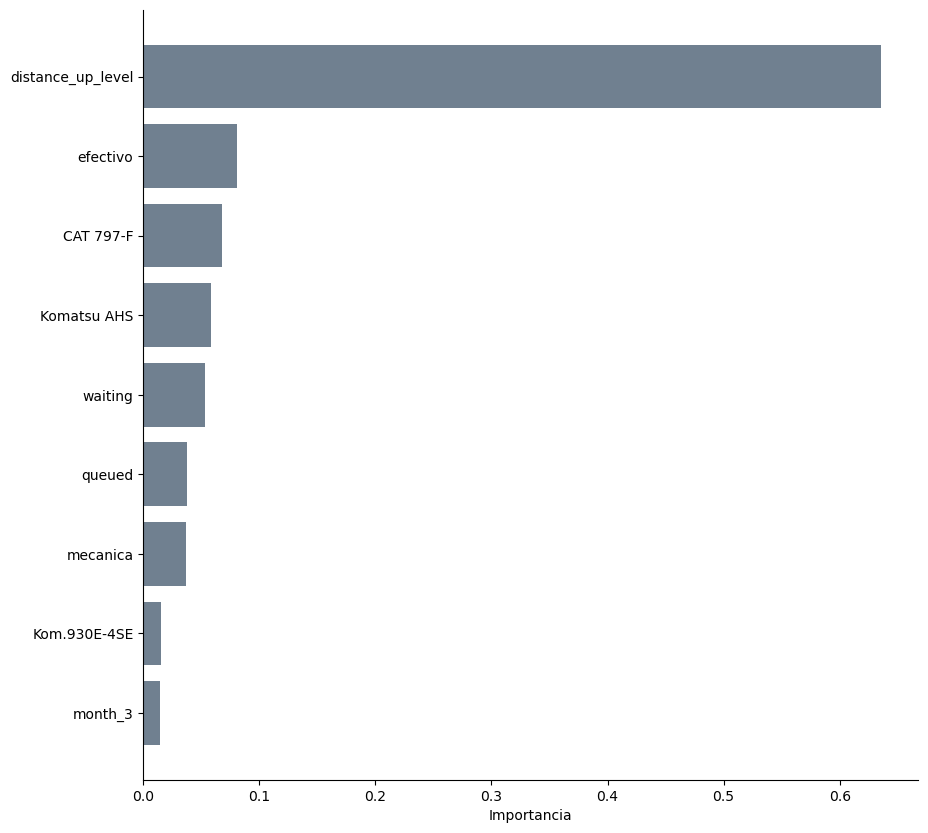

In [41]:
# Graficar importancias
plt.figure(figsize=(10, 10))
plt.barh(selected_features_pruned['Feature'], selected_features_pruned['Importance'], color='slategray')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
sns.despine()
plt.show()

#### _4.2.2 Predicciones en el conjunto de testeo_

In [42]:
# Realizar predicciones con el modelo entrenado
predictions_lasso_test_pruned = best_model_lasso.predict(X_test_lasso)

In [43]:
# resultado de R2, RMSE y MSE
R2_RMSE(y_test_lasso, predictions_lasso_test_pruned)

R2: 0.576094495940373
RMSE: 12995.297719768094
MSE: 168877762.8254098


(None, None, None)

#### _4.2.3 Importancia de las variables según Shaplley Values_

100%|██████████| 471/471 [03:06<00:00,  2.52it/s]


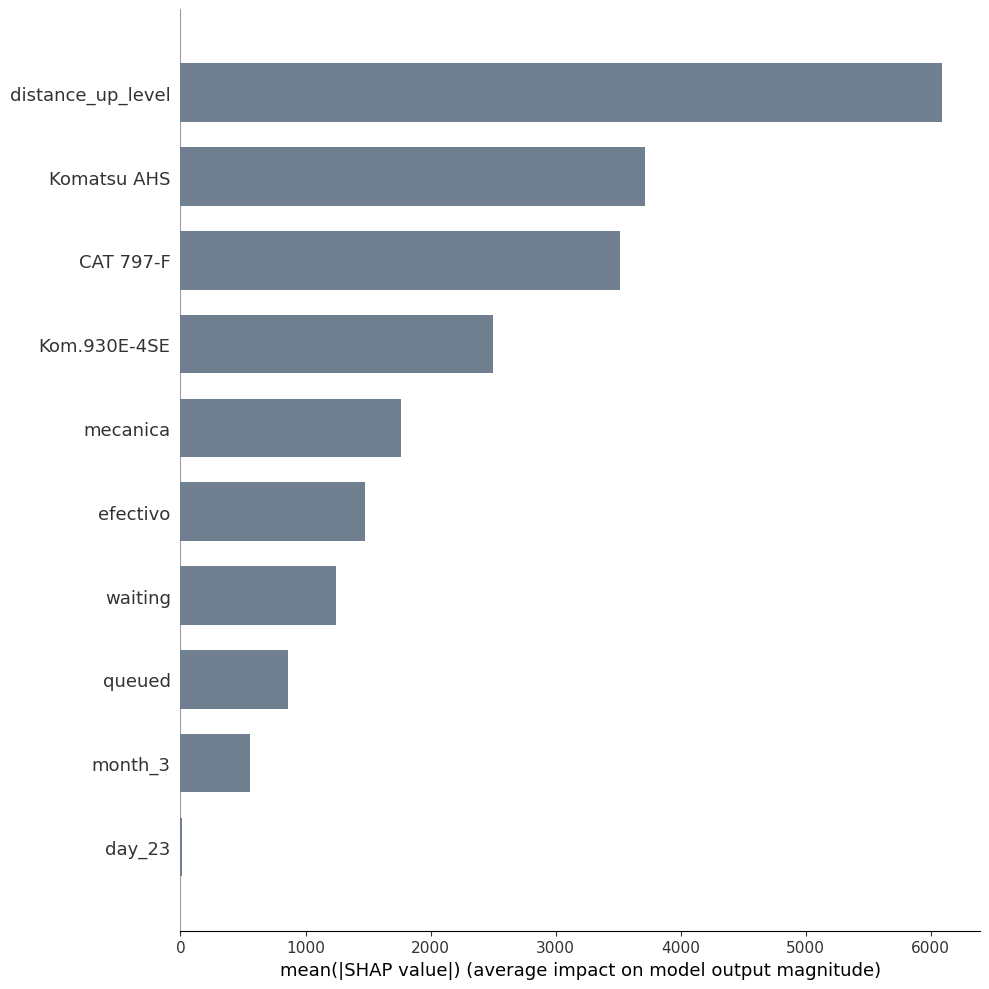

<Figure size 640x480 with 0 Axes>

In [60]:
# Crear un muestreo de fondo para el kernelExplainer
background = shap.sample(X_train_lasso, 100)

# Crear el objeto explainer SHAP con el modelo entrenado
explainer = shap.KernelExplainer(best_model_lasso.predict, background)
shap_values = explainer(X_test_lasso)

# Visualizar la importancia de las características
shap.summary_plot(shap_values, 
                  X_test_lasso, 
                  feature_names=X_test_lasso.columns, 
                  plot_type='bar', 
                  color='slategray',
                  max_display=10,
                  plot_size=(10, 10))

# guardamos la imagen 
plt.savefig('../Graficos/decisiontree_importance.png')

# Mostrar la gráfica
plt.show()

## _**5 Modelo DecisionTreeRegressor Optimizado**_

### _5.1 Hiperparámetros_

In [44]:
# Definir los hiperparámetros para la búsqueda
param_dist_tree = {
    'max_depth': randint(1, 200),
    'min_samples_split': randint(2, 200),
    'min_samples_leaf': randint(1, 200),
    'max_features':  [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'min_impurity_decrease': uniform(0,1)
}

# Crear la búsqueda de hiperparámetros para DecisionTreeRegressor
random_search_tree = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=param_dist_tree,
    n_iter=10000,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Ajustar el modelo
random_search_tree.fit(X_train_lasso, y_train_lasso)

# Mejor combinación de hiperparámetros para el árbol de decisión
best_params_tree = random_search_tree.best_params_
print("Best parameters for DecisionTreeRegressor: ", best_params_tree)


Best parameters for DecisionTreeRegressor:  {'criterion': 'poisson', 'max_depth': 79, 'max_features': None, 'min_impurity_decrease': 0.37814133734377986, 'min_samples_leaf': 7, 'min_samples_split': 72}


In [45]:
# Crear el DecisionTreeRegressor con los mejores parámetros encontrados
best_tree = DecisionTreeRegressor(**best_params_tree)

In [46]:
# Entrenar el modelo DecisionTreeRegressor con los mejores hiperparámetros
best_tree.fit(X_train_lasso, y_train_lasso)

DecisionTreeRegressor(criterion='poisson', max_depth=79,
                      min_impurity_decrease=0.37814133734377986,
                      min_samples_leaf=7, min_samples_split=72)

#### _5.1.1 Predicciones en el conjunto de entrenamiento_

In [47]:
# Realizar predicciones en el conjunto de entrenamiento
predictions_lasso_hiper_train = best_tree.predict(X_train_lasso)

# Realizar predicciones en el conjunto de prueba
predictions_lasso_hiper_test = best_tree.predict(X_test_lasso)

In [48]:
# resultados de R2, RMSE y MSE
R2_RMSE(y_train_lasso, predictions_lasso_hiper_train)

R2: 0.683552455329999
RMSE: 11203.315848233624
MSE: 125514285.99528266


(None, None, None)

#### _5.1.2 Predicciones en el conjunto de testeo_

In [49]:
# resultados de R2, RMSE y MSE
R2_RMSE(y_test_lasso, predictions_lasso_hiper_test)

R2: 0.5824981411215835
RMSE: 12896.768746205858
MSE: 166326644.09311223


(None, None, None)

In [50]:
# Graficar el árbol de decisión
dot_data_best = export_graphviz(best_tree, out_file=None, 
                            feature_names=X_train_lasso.columns,  
                            filled=True, rounded=True,  
                            special_characters=True)  
graph = graphviz.Source(dot_data_best)  
graph.render("../Graficos/payload_tree_best")

'../Graficos/payload_tree_best.pdf'

### _5.2 Poda Árbol Hiper parametrizado_

In [51]:
# Calcular el error cuadrático medio en el conjunto de prueba
y_pred_best_tree = best_tree.predict(X_test_lasso)
mse_best_tree = mean_squared_error(y_test_lasso, y_pred_best_tree)
print(f"Error cuadrático medio sin poda: {mse_best_tree}")

# Podar el árbol
path = best_tree.cost_complexity_pruning_path(X_train_lasso, y_train_lasso)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

model_best_trees = []
for ccp_alpha in ccp_alphas:
    best_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    best_tree.fit(X_train_lasso, y_train_lasso)
    model_best_trees.append(best_tree)

# Eliminar el último regresor, ya que corresponde al árbol no podado
model_best_trees = model_best_trees[:-1]
ccp_alphas = ccp_alphas[:-1]

# Evaluar el error cuadrático medio de cada árbol podado en el conjunto de prueba
mses = [mean_squared_error(y_test_lasso, best_tree.predict(X_test_lasso)) for best_tree in model_best_trees]

# Encontrar el índice del mejor árbol (el que tiene el menor error cuadrático medio)
best_index = mses.index(min(mses))
best_model_tree = model_best_trees[best_index]
best_ccp_alpha = ccp_alphas[best_index]

# Calcular y mostrar el error cuadrático medio del mejor árbol podado
y_pred_pruned = best_model_tree.predict(X_test_lasso)
mse_pruned = mean_squared_error(y_test_lasso, y_pred_pruned)
print(f"Error cuadrático medio con poda: {mse_pruned}")

Error cuadrático medio sin poda: 166326644.09311223
Error cuadrático medio con poda: 245454683.5404429


In [52]:
# Graficar el árbol de decisión
dot_data_best_pruned = export_graphviz(best_model_tree, out_file=None, 
                            feature_names=X_train_lasso.columns,  
                            filled=True, rounded=True,  
                            special_characters=True)  
graph = graphviz.Source(dot_data_best_pruned)  
graph.render("../Graficos/payload_tree_best_pruned")

'../Graficos/payload_tree_best_pruned.pdf'

#### _5.2.1 Predicciones en el conjunto de entrenamiento_

In [53]:
# Realizar predicciones en el conjunto de entrenamiento
predictions_best_train_pruned = best_model_tree.predict(X_train_lasso)

In [54]:
# resultado de R2, RMSE y MSE
R2_RMSE(y_train_lasso, predictions_best_train_pruned)

R2: 0.9999960827381302
RMSE: 39.41731312921456
MSE: 1553.7245743265507


(None, None, None)

#### _5.2.2 Predicciones en el conjunto de testeo_

In [55]:
# Realizar predicciones en el conjunto de test
predictions_best_test_pruned = best_model_tree.predict(X_test_lasso)

In [56]:
# resultado de R2, RMSE y MSE
R2_RMSE(y_test_lasso, predictions_best_test_pruned)

R2: 0.3838763043209138
RMSE: 15666.993442918234
MSE: 245454683.5404429


(None, None, None)